In [1]:
#numpyの準備
import numpy as np

In [2]:
# csvファイルの表示
with open('./2D_example.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602



In [3]:
#dataにデータをセット
data = np.loadtxt("2D_example.csv", delimiter=',')

In [4]:
# 1列目がラベル。整数に変換
y = data[:,0].astype(int)

In [5]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [6]:
# 2,3列目がデータ
X = data[:,1:3]

In [7]:
X

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

In [8]:
# Xの1列目（csvファイルの2列目）
X[:, 0]

array([-7.428476,  2.980693,  3.988255, -5.789437, -4.894447, -1.933949,
       -1.611771, -6.670152, -2.931415, -0.074762, -2.691793,  0.461182,
       -1.354135, -6.229476,  2.778594, -5.719578,  0.928322,  0.850475,
       -6.029489,  1.116025])

In [9]:
# Xの2列目（csvファイルの3列目）
X[:, 1]

array([ 1.509903,  1.960821,  4.636389, -4.621614, -3.26973 , -0.047276,
        5.932201, -1.036282, -0.104475,  1.070002,  4.168774,  3.453438,
        3.751657, -1.209434,  7.582103, -0.243509,  3.20852 ,  2.908955,
       -1.831199,  3.353602])

In [10]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline
# 色設定
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

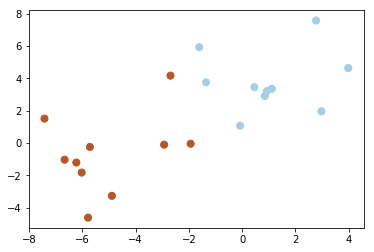

In [11]:
# 2次元散布図でプロット
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [12]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [13]:
# モジュールの準備
from sklearn import neighbors

# オブジェクト作成
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


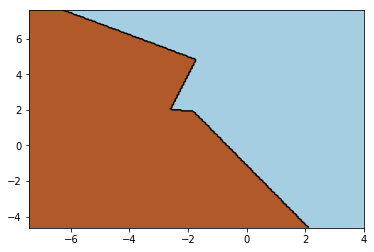

In [14]:
# 学習
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

# 境界線の描画
plotBoundary(X, clf)

In [15]:
# モジュールの準備
from sklearn import linear_model

# オブジェクト作成
clf = linear_model.LogisticRegression()

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


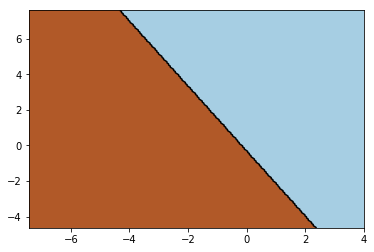

In [16]:
# 学習
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

# 境界線の描画
plotBoundary(X, clf)

In [17]:
# モジュールの準備
from sklearn import svm

# オブジェクト作成
clf = svm.SVC(kernel='linear')

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


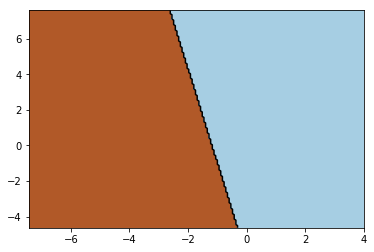

In [18]:
# 学習
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

# 境界線の描画
plotBoundary(X, clf)

In [19]:
# モジュールの準備
from sklearn import svm

# オブジェクト作成
clf = svm.SVC(kernel='rbf')

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


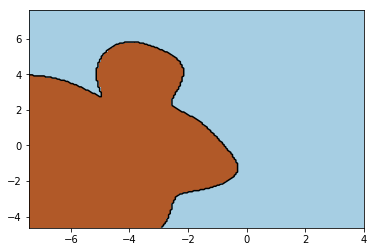

In [20]:
# 学習
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

# 境界線の描画
plotBoundary(X, clf)